<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

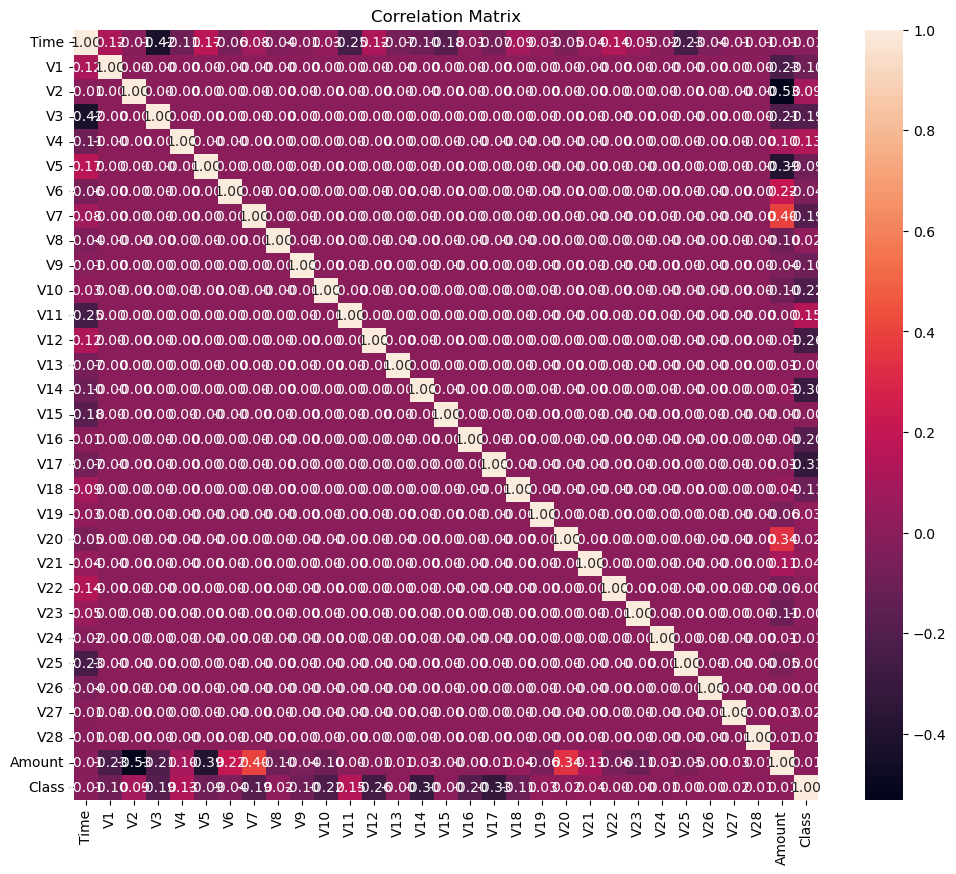

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/creditcard.csv')

# Data Exploration
df.head()
df.shape
df.info()
df.describe()

# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [3]:
# Scaling 'Amount' and 'Time'
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame
df_scaled = df.copy()

# Initialize the scaler
scaler = StandardScaler()

# Scale 'Amount' and 'Time' features
df_scaled['Amount'] = scaler.fit_transform(df[['Amount']])
df_scaled['Time'] = scaler.fit_transform(df[['Time']])


In [4]:
# Apply SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

# Separate input features and target
X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [5]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f"ROC AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[55365  1385]
 [ 4426 52550]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

ROC AUC Score: 0.9896


In [8]:
# Create a DataFrame for coefficients
import pandas as pd

coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
})

# Sort by absolute value of the coefficient
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients.sort_values(by='Absolute_Coefficient', ascending=False, inplace=True)

# Display the top features
print(coefficients[['Feature', 'Coefficient']].head(10))


   Feature  Coefficient
29  Amount     2.329329
14     V14    -1.538267
12     V12    -1.100165
17     V17    -0.994501
20     V20    -0.967180
10     V10    -0.882762
28     V28     0.867008
5       V5     0.863716
4       V4     0.800826
1       V1     0.758461


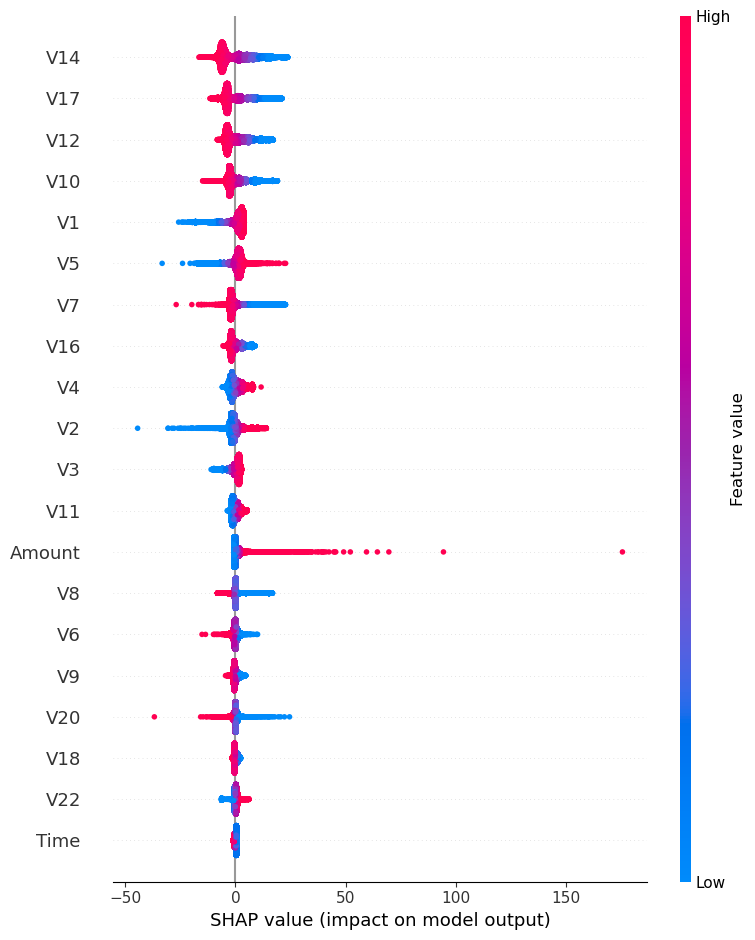

In [9]:
import shap

# Create an explainer for the logistic regression model
explainer = shap.LinearExplainer(log_reg, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot summary plot to see feature importance
shap.summary_plot(shap_values, X_test)


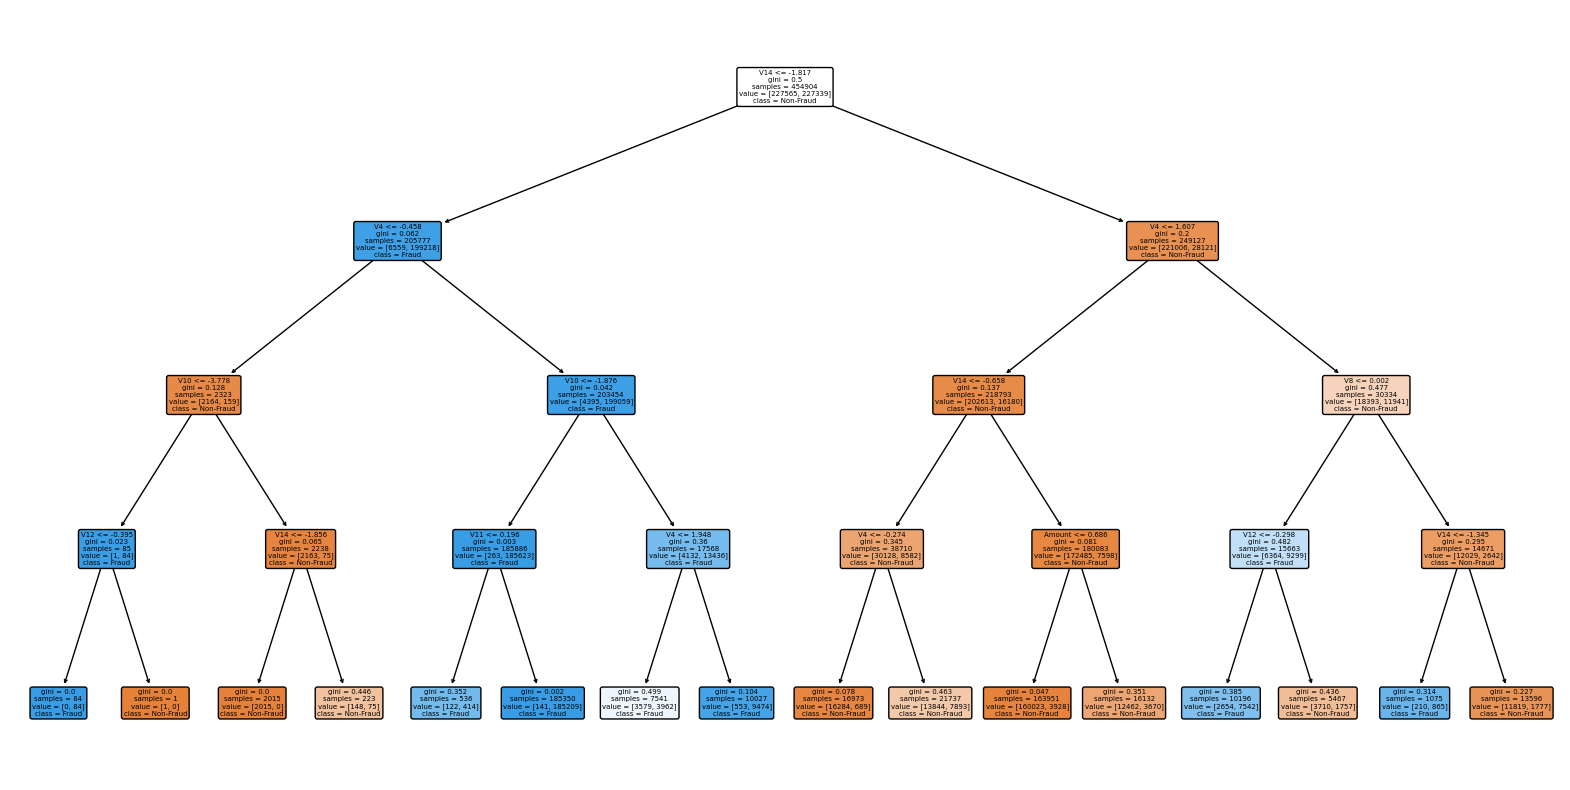

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Fit the Decision Tree Classifier (assuming tree_clf is trained)
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(
    tree_clf, 
    feature_names=X_train.columns.tolist(),  # Convert Index to list
    class_names=['Non-Fraud', 'Fraud'], 
    filled=True, 
    rounded=True
)
plt.show()


In [13]:
import pickle
import os

# Assuming `log_reg` is your trained model
model_path = "model/logistic_regression.pkl"

# Create the directory 'model' if it does not exist
if not os.path.exists('model'):
    os.makedirs('model')

# Save the trained model
with open(model_path, "wb") as file:
    pickle.dump(log_reg, file)

print("Model saved successfully.")


Model saved successfully.


In [16]:
import joblib

# Save the model
joblib.dump(log_reg, "model/logistic_regression_2.pkl")
print("Model saved successfully.")


Model saved successfully.
